In [145]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import pandas as pd
import nglview as nv

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [2]:
pdb='/home/t/comp_chem_class/ABL1/ABL1.pdb'
trajectory='/home/t/comp_chem_class/ABL1/ABL1.dcd'
outdir='/home/t/comp_chem_class/ABL1'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /home/t/comp_chem_class/ABL1
pdb: /home/t/comp_chem_class/ABL1/ABL1.pdb
trjaectory: /home/t/comp_chem_class/ABL1/ABL1.dcd


In [3]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [4]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [7]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [8]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [9]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(350.0, 400.0)

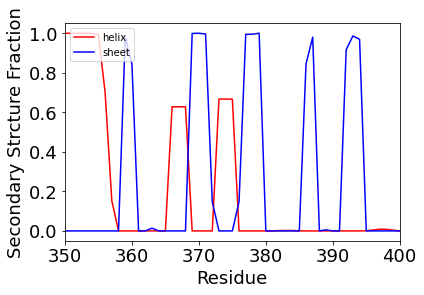

In [10]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(350,400)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

In [71]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full=md.compute_dssp(trj,simplified=False)


In [72]:
#let's plot the fraction of pi helix, "I" for each residue
dssp_I = np.where(dssp_full == "I",1,0)

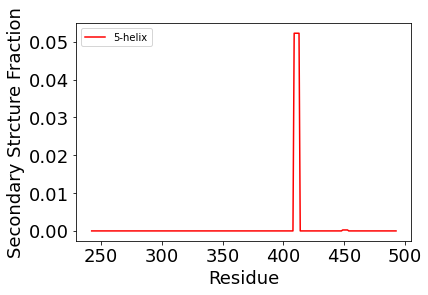

In [73]:
plt.plot(residue_num,np.sum(dssp_I,axis=0)/dssp_full.shape[0],c='r',label='5-helix')
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


In [402]:
#color frame 0
np.where(dssp_I[0,:]==1)[0]+242
print("There are five residues with ss pi helix:",np.where(dssp_I[0,:]==1)[0]+242)

There are five residues with ss pi helix: [409 410 411 412 413]


In [242]:
#Here I am coloring the five residues with ss element "I" licorice and the rest blue!

t = nv.MDTrajTrajectory(trj[0])
view = nv.NGLWidget(t)
view

NGLWidget()

In [286]:
view.clear_representations()
view.add_cartoon(opacity=.1)
view.add_licorice("409, 410, 411, 412, 413")


***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

In [75]:
#### Challenge Problem Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type
"""my function returns a data frame of all the ss fractions as well as a dictionary giving the residues that have a 
fraction>cutoff for each ss type, cuttoff is a variable! """
        

'my function returns a data frame of all the ss fractions as well as a dictionary giving the residues that have a \nfraction>cutoff for each ss type, cuttoff is a variable! '

In [284]:
ss_full = ["H","B","E","G","I","T","S"," "]
ss = ["H","E","C"]

In [64]:
def challenge_1(ss,dssp,res,cutoff):
    tot = []
    dic = {}
    for i in ss:
        a = np.where(dssp==i,1,0)
        frac = np.sum(a,axis=0)/dssp.shape[0]
        tot.append(frac)
    arr = np.stack(tot,axis=0)
    df = pd.DataFrame(data=arr,index=ss,columns=res)
    for j in ss:
        cols = np.asarray(df.columns[df.loc[j]>cutoff])
        dic.update({j:cols})
        
        
    return df,dic

In [81]:
dssp_df,dic = challenge_1(ss_full,dssp_full,residue_num,.9)

In [82]:
dssp_df

,242,243,244,245,246,247,248,249,250,251,...,484,485,486,487,488,489,490,491,492,493
H,0.0,0.000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.0,0.0,0.92475,0.93000,0.93100,0.93150,0.50200,0.27250,0.15100,0.0
B,0.0,0.000,0.0000,0.00000,0.00000,0.00175,0.00000,0.0000,0.00000,0.00325,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
E,0.0,0.537,0.8675,0.86775,0.93075,0.99575,0.97300,0.9680,0.88500,0.42250,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
G,0.0,0.000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.0,0.0,0.04300,0.04475,0.04550,0.02375,0.10425,0.10425,0.09825,0.0
I,0.0,0.000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,...,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
T,0.0,0.000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00025,0.00025,...,0.0,0.0,0.02675,0.02500,0.01875,0.03475,0.37175,0.59725,0.35425,0.0
S,0.0,0.000,0.0035,0.04225,0.04950,0.00000,0.00125,0.0065,0.01125,0.02900,...,0.0,0.0,0.00550,0.00025,0.00450,0.00800,0.02200,0.02525,0.00000,0.0
,1.0,0.463,0.1290,0.09000,0.01975,0.00250,0.02575,0.0255,0.10350,0.54500,...,1.0,1.0,0.00000,0.00000,0.00025,0.00200,0.00000,0.00075,0.39650,1.0


In [83]:
print(dic)

{'H': array([281, 282, 283, 324, 325, 326, 327, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
       410, 411, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432,
       433, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 486, 487,
       488, 489]), 'B': array([298]), 'E': array([246, 247, 248, 249, 255, 256, 257, 258, 259, 260, 261, 266, 267,
       268, 269, 270, 271, 272, 301, 302, 303, 304, 313, 314, 315, 369,
       370, 371, 377, 378, 379, 392, 393, 394, 415, 416, 417]), 'G': array([], dtype=int64), 'I': array([], dtype=int64), 'T': array([262, 263, 264, 265, 275, 276, 277, 296, 297, 319, 320, 332, 333,
       334, 358, 418, 419, 434, 435]), 'S': array([307, 308, 309, 310, 390, 391, 414, 436, 439, 440, 478, 479, 483]), ' ': array([242, 274, 279, 293, 294, 299, 300, 311, 317, 318, 331, 336, 361,
       363, 364, 380, 381, 382, 385, 388, 402, 407, 437, 438, 444, 457,
       459, 460, 461, 465, 477, 484, 485, 493])}


Text(0.5, 0, 'Residue')

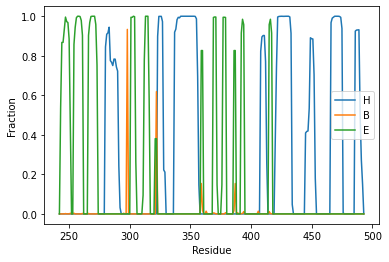

In [223]:
#plot a few elements of the data frame
for i in ss_full[:3]:
    plt.plot(residue_num,dssp_df.loc[i],label=i)
plt.legend()
plt.ylabel("Fraction")
plt.xlabel("Residue")

Text(0.5, 0, 'Residue')

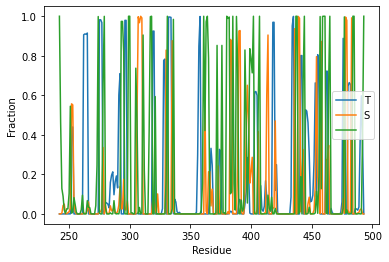

In [395]:
#plot last few elements of the data frame
for i in ss_full[-3:]:
    plt.plot(residue_num,dssp_df.loc[i],label=i)
plt.legend()
plt.ylabel("Fraction")
plt.xlabel("Residue")

***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

In [93]:
#using the function with a cutoff of .4 for coil and helix
df_simple,dic_simple = challenge_1(ss,dssp,residue_num,.4)

In [255]:
#im going to use the results of my function for this
for i in dic_simple["H"]:
    tf = i in dic_simple["C"]
    if tf == True:
        print(i,tf)
print("there are 4 residues in a row that satisfy the criteria, lets color them in two representative frames")

445 True
446 True
447 True
448 True
there are 4 residues in a row that satisfy the criteria, lets color them in two representative frames


In [275]:
445-242

203

In [272]:
dssp[0,203:207]

array(['C', 'C', 'C', 'C'], dtype='<U2')

In [279]:
dssp[3999,203:207]

array(['H', 'H', 'H', 'H'], dtype='<U2')

Frame 0 has the 4 residues all in coil and frame 3999 has the 4 residues in helix

Im going to make an ngl view wiget that slides between frame 0 and 2

In [280]:
frame_sel = np.array([0,3999])

In [281]:
"""BOTH REPRESENTATIVE FRAMES ARE IN WIGET, pull the slider ALL THE WAY TO THE LEFT/RIGHT
first structure is coil,second is helix
the 4 residues are licorice"""
t1 = nv.MDTrajTrajectory(trj[frame_sel])
view1 = nv.NGLWidget(t1)
view1

NGLWidget(count=2)

In [285]:
view1.clear_representations()
view1.add_cartoon(color="blue",opacity=.1)
view1.add_licorice("445, 446, 447, 448")

In [97]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [120]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [122]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



I found the residues for questions 3 and 4 by plotting all of the 2-d histograms and inspecting the plots. I deleted them after to make the notebook less ugly

In [ ]:
#find frames

In [295]:
frame_chi1 = []
for i,j in [[-1,-.99],[1,1.2]]:
    idx = np.where((i<dihedral_dict["chi1"][313])&(dihedral_dict["chi1"][313]<j))
    frame_chi1.append(idx)

In [323]:
for i in frame_chi1[0][0].tolist():
    if (dihedral_dict["chi2"][313][i]<-3):
        print(i,dihedral_dict["chi1"][313][i],dihedral_dict["chi2"][313][i])

76 -0.9943941 -3.0702147
139 -0.99428254 -3.1094978
422 -0.9949162 -3.0890524
1068 -0.9916526 -3.0268345
1413 -0.9917556 -3.050051
2023 -0.99777305 -3.102738
3455 -0.997642 -3.1056783


In [326]:
for i in frame_chi1[1][0].tolist():
    if (dihedral_dict["chi2"][313][i]>3):
        print(i,dihedral_dict["chi1"][313][i],dihedral_dict["chi2"][313][i])

249 1.0022564 3.0888762
270 1.1915543 3.0876231
282 1.0260859 3.1393442
293 1.0800049 3.0591877
297 1.0229907 3.0400715
299 1.0463433 3.085641
302 1.0788814 3.0278533
348 1.1770334 3.0836587
548 1.1178141 3.0588784
562 1.1972903 3.0569065
573 1.1977601 3.0485337
576 1.0621028 3.018173
586 1.0736216 3.1374238
604 1.0957348 3.1147916
605 1.1111798 3.0330787
609 1.0047358 3.0096807
611 1.0448698 3.0534725
858 1.0456294 3.1181831
1012 1.0912589 3.072296
1016 1.1297258 3.0502822
1018 1.1058543 3.0679767
1022 1.0645319 3.0318344
1028 1.1190298 3.0275028
1326 1.0372356 3.0619614
1337 1.1783873 3.1408076
1349 1.1234546 3.025751
1350 1.1174859 3.1055892
1355 1.1828866 3.0038056
1365 1.1653407 3.033933
1372 1.1674187 3.106042
1373 1.0643319 3.114957
1374 1.1390667 3.0643463
1377 1.1587352 3.1106627
2274 1.1981088 3.0559554
2280 1.0848556 3.0187979
2282 1.0356883 3.0876212
2284 1.0670277 3.0949883
2300 1.1640174 3.117835
2312 1.1029283 3.1374848
2321 1.0917066 3.134095
2333 1.1569579 3.1298587
23

In [324]:
print("state 1","chi1:",dihedral_dict["chi1"][313][2023],"chi2:",dihedral_dict["chi2"][313][76])

state 1 chi1: -0.99777305 chi2: -3.0702147


In [327]:
print("state 2","chi1:",dihedral_dict["chi1"][313][3969],"chi2:",dihedral_dict["chi2"][313][3969])

state 2 chi1: 1.1151063 chi2: 3.0584486


The state 1 marker is hard to see but the point it is plotted at is printed above


Text(0, 0.5, '$\\chi_2$')

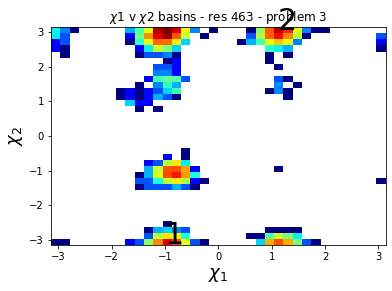

In [404]:
print("The state 1 marker is hard to see but the point it is plotted at is printed above")
plt.hist2d(dihedral_dict["chi1"][313],dihedral_dict["chi2"][313],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
plt.annotate("1",(dihedral_dict["chi1"][313][2023],dihedral_dict["chi2"][313][2023]),color="black",size="30")
plt.annotate("2",(dihedral_dict["chi1"][313][3969],dihedral_dict["chi2"][313][3969]),color="black",size="30")
plt.title("$\chi1$ v $\chi2$ basins - res 463 - problem 3")
plt.xlabel('$\chi_1$', size=18)
plt.ylabel('$\chi_2$', size=18)

the structures for probs 3,4 are going to be dislayed in the same manner as above

In [330]:
frame_sel2 = np.array([2023,3969])

In [392]:
"""first structure is basin 1,second is basin 2"""
t2 = nv.MDTrajTrajectory(trj[frame_sel2])
view2 = nv.NGLWidget(t2)
view2

NGLWidget(count=2)

In [393]:
view2.clear_representations()
view2.add_cartoon(color="blue",opacity=.1)
view2.add_licorice("313")

***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


In [224]:
phi_ = dihedral_dict["phi"][463]
psi_ = dihedral_dict["psi"][463]

In [229]:
#state 1
for i in range(phi_.size):
    if ((phi_[i]>-1.5)&(phi_[i]<-1)&(psi_[i]>-.1)&(psi_[i]<.1)):
        print(i,phi_[i],psi_[i])

101 -1.2504597 -0.04631483
103 -1.1202729 0.049379524
105 -1.3341402 0.03123042
110 -1.4911729 -0.037133943
111 -1.3313292 0.049808208
124 -1.2430017 -0.02315483
147 -1.0712051 0.028988494
150 -1.0274483 0.076533325
338 -1.3057225 0.09057782
342 -1.324419 0.019896552
499 -1.0860434 -0.048617776
500 -1.2630635 0.028313521
511 -1.3193038 0.041569956
512 -1.1719674 0.019514559
514 -1.3261836 0.0491148
518 -1.0147713 0.0038418032
519 -1.3110688 0.040311337
527 -1.4916224 -0.0026654082
529 -1.1863815 -0.03488731
530 -1.461447 -0.068875074
538 -1.2671168 -0.010277212
542 -1.3241479 0.01861788
547 -1.2369841 0.016377771
549 -1.3874228 0.058454335
563 -1.3109647 -0.08135708
564 -1.3995675 -0.0022638878
571 -1.184519 -0.051258773
574 -1.391837 0.03982842
575 -1.3418717 0.058017768
576 -1.1394043 0.09989358
578 -1.260535 0.053552166
580 -1.0945789 -0.09501191
581 -1.4096389 0.06980163
587 -1.3851802 0.06038924
588 -1.1847333 0.03639809
592 -1.2089264 -0.033250105
594 -1.3369038 0.06459963
597 -1

In [230]:
#state 2
for i in range(phi_.size):
    if ((phi_[i]>1.3)&(phi_[i]<1.7)&(psi_[i]>-.1)&(psi_[i]<.1)):
        print(i,phi_[i],psi_[i])

4 1.4625959 -0.09013622
10 1.356667 -0.07680733
13 1.3959825 0.087697536
17 1.505033 -0.038686663
45 1.38289 0.08815131
46 1.5629958 0.045865864
59 1.3646106 0.06490801
62 1.4804446 0.011649858
76 1.4206893 -0.09819879
80 1.4223115 -0.061540753
87 1.4766456 -0.08479457
91 1.5376706 0.07822231
94 1.579151 -0.033730578
95 1.4823929 0.059769925
97 1.3216103 0.000991808
165 1.4020878 -0.04360031
166 1.4060994 -0.06450735
167 1.4052291 -0.008618786
172 1.5420506 0.007911983
180 1.3676424 0.055391733
183 1.5517392 0.04199029
184 1.331085 -0.063330404
196 1.3365837 0.022315744
198 1.3916676 -0.0728827
199 1.3641357 -0.0035558695
202 1.3354692 -0.00014368532
206 1.3024151 0.08648793
225 1.3944201 -0.03764662
226 1.3883075 -0.031636734
227 1.4984357 -0.06308304
229 1.3167492 0.07484028
260 1.5410258 -0.08685276
262 1.5416237 -0.011945348
282 1.3821448 -0.06340365
289 1.6674874 -0.039915465
292 1.3962803 -0.060064804
301 1.3153932 -0.092982106
303 1.4013165 -0.046759527
314 1.4555814 -0.07602877

Text(0, 0.5, '$\\psi$')

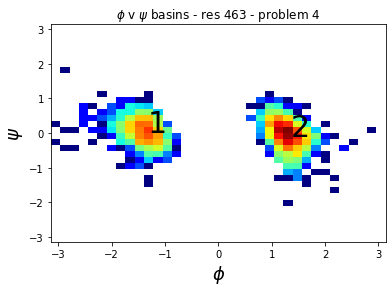

In [389]:
_=plt.hist2d(dihedral_dict["phi"][463],dihedral_dict["psi"][463],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
plt.annotate("1",(dihedral_dict["phi"][463][105],dihedral_dict["psi"][463][105]),color="black",size="30")
plt.annotate("2",(dihedral_dict["phi"][463][10],dihedral_dict["psi"][463][10]),color="black",size="30")
plt.title("$\phi$ v $\psi$ basins - res 463 - problem 4 ")
plt.xlabel('$\phi$', size=18)
plt.ylabel('$\psi$', size=18)

In [337]:
frame_sel3 = [105,10]

In [399]:
"""first structure is basin 1,second is basin 2
I put the residue of interest (463) in red and the surrounding 2 in licorice"""
t3 = nv.MDTrajTrajectory(trj[frame_sel3])
view3 = nv.NGLWidget(t3)
view3

NGLWidget(count=2)

In [400]:
view3.clear_representations()
view3.add_cartoon(color="blue",opacity=.1)
view3.add_licorice("462, 463, 464")
view3.add_licorice("463",color="red")

***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**
residue == 400

In [381]:
phi__ = dihedral_dict["phi"][400]
psi__ = dihedral_dict["psi"][400]
x1__ = dihedral_dict["chi1"][400]
x2__ = dihedral_dict["chi2"][400]

In [374]:
#state 1
st1_f = []
for i in range(phi__.size):
    if ((phi__[i]>-1.5)&(phi__[i]<-1.3)&(psi__[i]>-.5)&(psi__[i]<-.3)):
        st1_f.append(i)
        print(phi__[i],psi__[i],i)
st1_arr = np.asarray(st1_f)

-1.4205669 -0.48769945 280
-1.3835229 -0.3101042 302
-1.4106674 -0.33417308 303
-1.3489742 -0.44494972 337
-1.4841982 -0.4388828 1149
-1.3523598 -0.3476779 1152
-1.3368613 -0.34741294 1153
-1.4353058 -0.3424476 1449
-1.4303652 -0.3267569 1455
-1.3041166 -0.33915174 1463
-1.4009788 -0.38521147 1467
-1.3040239 -0.37411436 1477
-1.4939313 -0.34980327 1657
-1.4504898 -0.4765669 1662
-1.4029834 -0.3181271 1675
-1.3980992 -0.4066735 1677
-1.4649903 -0.31299123 1690
-1.3705441 -0.47437036 1708
-1.3460776 -0.3139605 1714
-1.337243 -0.46754688 1743
-1.4407505 -0.4638696 1747
-1.3793097 -0.4099857 1766
-1.3654392 -0.333231 1775
-1.3842422 -0.32186732 1781
-1.497178 -0.31892896 1789
-1.3792018 -0.4785889 1794
-1.3240027 -0.3344827 1795
-1.3000528 -0.41193128 1807
-1.3751247 -0.475588 1813
-1.4598563 -0.31120682 1815
-1.4811381 -0.4664334 1816
-1.3252163 -0.44824353 1830
-1.3799199 -0.35610285 1840
-1.3376627 -0.47955447 1844
-1.4922045 -0.40527096 1848
-1.4046617 -0.3911053 1849
-1.3354741 -0.450

In [375]:
#state 2
st2_f = []
for i in range(phi__.size):
    if ((phi__[i]>-2.7)&(phi__[i]<-2.5)&(psi__[i]>2.7)&(psi__[i]<2.8)):
        st2_f.append(i)
        print(phi__[i],psi__[i],i)
st2_arr = np.asarray(st2_f)

-2.5283127 2.7429993 163
-2.6769476 2.7190695 444
-2.5285535 2.701796 584
-2.6140983 2.717492 646
-2.5180204 2.7816536 766
-2.6689548 2.711473 770
-2.6483943 2.7024477 776
-2.644389 2.7285295 796
-2.6130066 2.7812796 831
-2.6242952 2.7783134 1217
-2.5237732 2.7595086 1393
-2.5004268 2.7785532 2876
-2.6272297 2.7144003 2880
-2.636918 2.7089818 2888
-2.6648293 2.7221947 2900
-2.532639 2.730395 2922
-2.639683 2.7120152 2937
-2.6104927 2.7234778 2958
-2.5020556 2.760771 2962
-2.5199456 2.770015 2982
-2.5509107 2.7176485 2998
-2.687796 2.7027564 3005
-2.5031364 2.770887 3013
-2.5490646 2.7466354 3043
-2.504815 2.7321565 3052
-2.6863847 2.790394 3053
-2.6972716 2.769025 3060
-2.6542275 2.778911 3077
-2.5945272 2.7869928 3101
-2.5340712 2.7762954 3102
-2.5625222 2.7518787 3105
-2.6532247 2.7543268 3112
-2.5150113 2.7491372 3121
-2.5291932 2.7011995 3148
-2.5294588 2.796052 3152
-2.6884687 2.722001 3153
-2.5921996 2.7224925 3155
-2.5216787 2.7733233 3172
-2.6794608 2.776339 3183
-2.6884701 2.7

In [385]:
i=280
j=163

Text(0.5, 1.0, 'Dihedral Basins - res 400 - challenge problem 2')

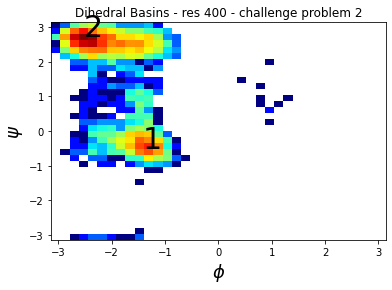

In [386]:
_=plt.hist2d(dihedral_dict["phi"][400],dihedral_dict["psi"][400],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
plt.annotate("1",(phi__[i],psi__[i]),color="black",size="30")
plt.annotate("2",(phi__[j],psi__[j]),color="black",size="30")
plt.title("Annotated")
plt.xlabel('$\phi$', size=18)
plt.ylabel('$\psi$', size=18)
plt.title("Dihedral Basins - res 400 - challenge problem 2")


Text(0.5, 1.0, '$\\chi2$ distribution for basin 2')

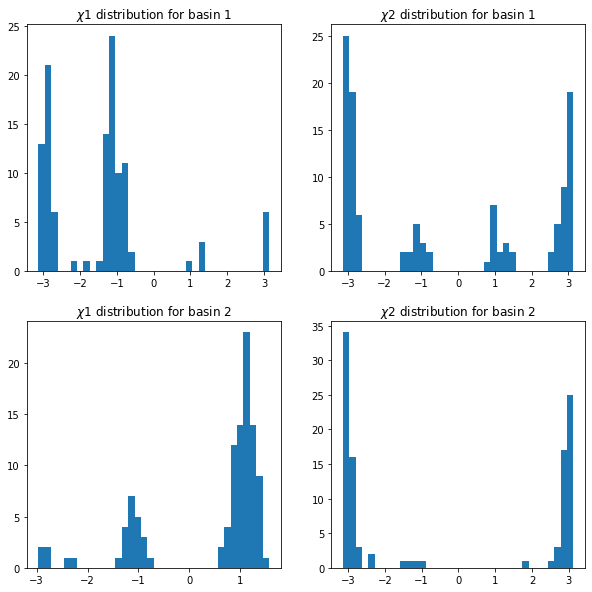

In [387]:
#challenge problem 2
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(x1__[st1_arr],bins=36)
ax[0,1].hist(x2__[st1_arr],bins=36)
ax[1,0].hist(x1__[st2_arr],bins=36)
ax[1,1].hist(x2__[st2_arr],bins=36)
ax[0,0].set_title("$\chi1$ distribution for basin 1")
ax[0,1].set_title("$\chi2$ distribution for basin 1")
ax[1,0].set_title("$\chi1$ distribution for basin 2")
ax[1,1].set_title("$\chi2$ distribution for basin 2")

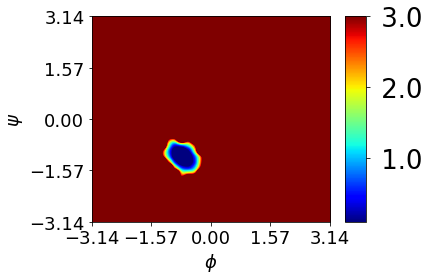

In [23]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],36,[[-3.14,3.14],[-3.14,3.14]],normed=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_FES(350)